# VTune



In [29]:
import os
import platform
import subprocess
import pandas as pd
import numpy
from IPython.display import Image

RUNS = 10

FILENAME = 'MM.csv'

def system_info():
    print(os.name, platform.system(), platform.release())
    print(os.popen("clinfo | grep -B 2 -A 4 'Device Vendor ID'").read())
    print(os.popen("clinfo | grep NOTE -A 3").read())
    
# Creating Pandas DataFrame 
if os.path.isfile(FILENAME):
    df = pd.read_csv(FILENAME)
else:
    df = pd.DataFrame({"version": [], "platform": [], "execution_time_s": []})
    
# List previous data
# List previous data (average)
df.groupby(['platform', 'version']) \
  .agg({'version':'count', 'execution_time_s':['mean', 'std']}) \
  .rename(columns={'version':'count','version':'executions'})# Creating Pandas DataFrame

executions  \
                                                           count   
platform                                  version                  
Intel(R) Iris(R) Xe MAX Graphics [0x4905] multiply1           10   
                                          multiply1_1         10   
                                          multiply1_2         10   
Intel(R) UHD Graphics P630 [0x3e96]       multiply1           10   
                                          multiply1_1         10   
                                          multiply1_2         10   
Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz  multiply1           10   
                                          multiply1_1         10   
                                          multiply1_2         10   

                                                      execution_time_s  \
                                                                  mean   
platform                                  version                        
Intel(R) Iris(R) Xe MAX Graphics [0x4905] multiply1           0.467663   
                                          multiply1_1         0.446880   
                                          multiply1_2         0.441772   
Intel(R) UHD Graphics P630 [0x3e96]       multiply1           0.629107   
                                          multiply1_1         0.583961   
                                          multiply1_2         0.542583   
Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz  multiply1           0.473350   
                                          multiply1_1         0.472813   
                                          multiply1_2         0.467650   

                                                                 
                                                            std  
platform                                  version                
Intel(R) Iris(R) Xe MAX Graphics [0x4905] multiply1    0.018742  
                                          multiply1_1  0.009822  
                                          multiply1_2  0.011985  
Intel(R) UHD Graphics P630 [0x3e96]       multiply1    0.002306  
                                          multiply1_1  0.002723  
                                          multiply1_2  0.003032  
Intel(R) Xeon(R) Gold 6128 CPU @ 3.40GHz  multiply1    0.010786  
                                          multiply1_1  0.013461  
                                          multiply1_2  0.019915

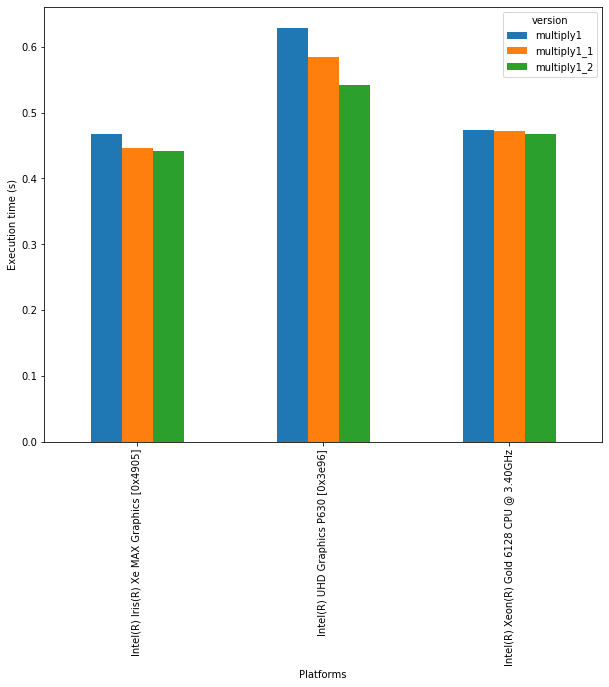

In [30]:
# Plot results
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(FILENAME)
df["version"] = pd.Categorical(df["version"])
df_pivot = pd.pivot_table(
    df,
    values = "execution_time_s",
    index = "platform",
    columns = "version",
    aggfunc = np.mean   
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(10, 8)
# Change the axes labels
ax.set_xlabel("Platforms")
ax.set_ylabel("Execution time (s)")

# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("page_views_barplot.png")